## Goal:
* Discover drivers of churn within the Telco dataset
* Use these drivers to develop a machine learning model to predict whether or not a customer will churn

#### Imports

In [1]:
# acquire
import wrangle as w
import env
import explore as e

# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire
* Data acquired from Codeup Database
* It contained 7043 rows and 24 columns before cleaning
* Each row represents a customer from the Telco company
* Each column represents a feature of those customers

## Prepare
### Prepare Actions:

* Dropped duplicate columns
* Removed columns that did not contain useful information
* Renamed columns to promote readability
* Checked for nulls in the data (there were none)
* Dropped Null Values stored as whitespace
* Checked that column data types were appropriate, converted total charges to the correct data type
* Encoded categorical variables
* Split data into train, validate and test (approx. 75/12.5/12.5), stratifying on 'churn'
* Outliers have not been removed for this iteration of the project

In [2]:
# acquiring telco data from codeup database
df = w.get_telco_data()

#Preparing telco data for exploration
df = w.prep_telco(df)

#Split data and set target variable
target = 'churn'
train, validate, test = w.train_validate_test_split(df, target)

## A brief look at the data

In [3]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,0,0,1,0,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,1,0,0,1,0,0


## Summary of the data

In [4]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.163145,32.549573,64.640583,2279.278230,0.495530,0.491670,0.301910,0.903088,0.590207,0.265949,...,0.546323,0.208046,0.245632,0.341325,0.438643,0.220033,0.215766,0.224096,0.335636,0.224502
std,0.369536,24.563833,30.096846,2254.640564,0.500031,0.499981,0.459133,0.295868,0.491845,0.441882,...,0.497900,0.405951,0.430505,0.474202,0.496271,0.414310,0.411394,0.417028,0.472260,0.417296
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.150000,400.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.300000,1398.975000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.850000,3810.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploration

## What is the percentage of customers who churn?

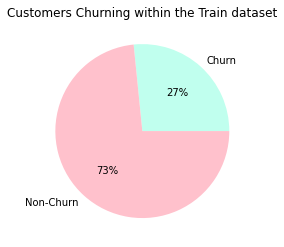

In [5]:
#Get pie chart for churn
w.get_pie_churn(train)

* **Approximately 27 percent of customers in this dataset "churned" (left the company)**

## Is there a relationship between being a Senior Citizen and Churn rate?

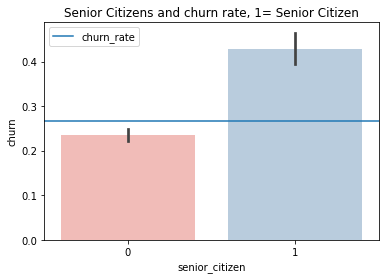

In [6]:
#Create bar chart (senior_citizen)
w.get_bar_senior(train)

### Senior Citizen vs. Churn:

* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens.**

$H_a$: **The churn rate of senior citizens is greater than the churn rate of non-senior citizens.**

In [7]:
#Get chi-square test results
w.get_chi_senior(train)

chi^2 = 128.7112
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that "Senior Citizen" and "Churn" are related. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does a customer having dependents affect churn?

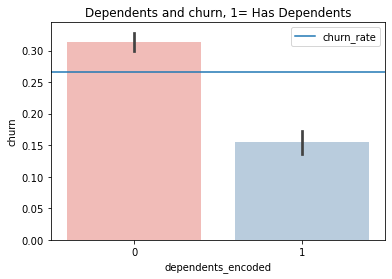

In [8]:
#Get bar chart comparing having depenedents with churn
w.get_bar_dependents(train)

### It appears that customers with dependents churn less than those without dependents.

### Dependents vs. Churn: Testing Significance of Relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of those with dependents is greater than or equal to those without dependents.**

$H_a$: **The churn rate of those with dependents is less than those without dependents.**

In [9]:
#Run chi-squared test on dependents vs churn
w.get_chi_dependents(train)

chi^2 = 133.9467
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that a customer having dependents is related to churn rate. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does a customer having a partner affect churn?

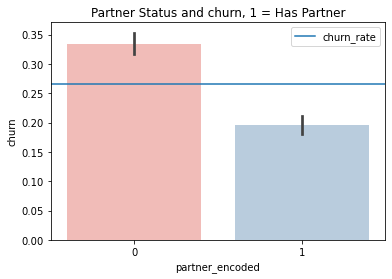

In [10]:
#Visualizing relationship between partner status and churn
w.get_bar_partner(train)

#### It appears that those with partners churn less than those without.

### Partner Status vs. Churn: Looking at the significance of the relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: **The churn rate of partnered customers is greater than or equal to the churn rate of single customers.**

$H_a$: **The churn rate of partnered customers is less than the churn rate of single customers.**

In [11]:
#Get chi-squared test for partner status vs churn
w.get_chi_partner(train)

chi^2 = 121.8975
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that a customer having a partner and churn are related. However, this feature is similar to having dependents, and may not add value when included in modeling.**

## Does customer contract type affect churn?

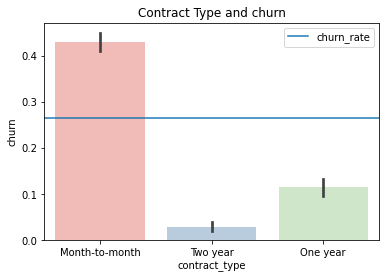

In [12]:
#Get bar chart comparing contract 
w.get_bar_contract(train)

#### It appears that customers with month-to-month contracts churn at a much higher rate than those with two-year contracts. Customers with one-year contracts churn less than month-to-month, but more than two-year contact customers.

### Contract Type vs. Churn: Testing Significance of Relationship

* Both variables are categorical so a Chi-Squared test is required
* I used a 95% confidence interval
* The resulting alpha value is .05

Hypotheses:

$H_0$: The churn rate of those on a month-to-month contract is less than or equal to other customers.

$H_a$: The churn rate of those on a month-to-month contract is greater than other customers.

In [13]:
#Running chi-squared test comparing contract type and churn
w.get_chi_contract(train)

chi^2 = 837.2493
p     = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that customer contract type is related to churn rate. I believe that including this feature in modeling will likely have a strong positive impact on model accuracy.**

## Does a customer's monthly charge amount impact churn?

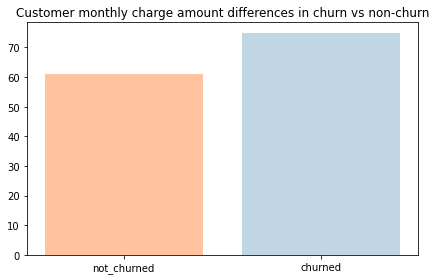

In [14]:
#Get viz of monthly charge vs churn
w.monthly_charges_md(train)

#### It appears that customers who have lower monthly charges churn less.

### Monthly Charges vs. Churn: Testing Significance of Relationship

* Monthly Charges is a continuous variable, and both populations are independent, so an independent T-Test is required.
* I used a 95% confidence interval (alpha value .05)
* Variances were tested and not equal, and indicated in testing parameter

Hypotheses:

$H_0$: **Customers with lower monthly charges have a churn rate greater than or equal to those with higher charges.**

$H_a$: **Customers with lower monthly charges have a lower churn rate than those with higher monthly charges.**

In [15]:
#Run T-test comparing monthly charges and churn status
w.get_t_monthly(train)

t = -16.0750
p = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that customer monthly charge amount is related to churn rate. I believe that including this feature in modeling will likely have a positive impact on model accuracy.**

## Does the total charges a customer has accrued impact churn rate?

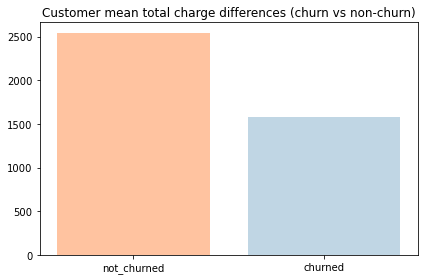

In [16]:
#Get bar chart comparing total charges with churn
w.total_charges_md(train)

#### It appears that customers with higher total charges churn less.

### Total Charges vs. Churn: Testing Significance of Relationship

* Total Charges is a continuous variable, and both populations are independent, so an independent T-Test is required.
* I used a 95% confidence interval (alpha value .05)
* Variances were tested and not equal, and indicated in testing parameter

Hypotheses:

$H_0$: Customers with higher total charges have a churn rate greater than or equal to those with lower total charges

$H_a$: Customers with higher total charges have a lower churn rate than those with lower total charges

In [17]:
#Run t-test comparing total charges and churn
w.get_t_total(train)

t = 14.6932
p = 0.0000


**The p-value is less than alpha. Therefore, there is evidence to support the hypothesis that customer total charge amount is related to churn rate.**

## Exploration Summary

* Most categorical variables in this dataset had significant relationships with the target variable of "churn"
* Categorical variables that did not impact churn were Gender and Phone Service
* Senior Citizen status is a driver of churn
* Both partner status and having dependents are drivers of churn
* More time to explore this data could yield greater results in exploration (feature engineering)

## Features I am moving to modeling with

* "Senior Citizen": significant difference in churn rates between customers who are senior citizens and those who are not
* "Has Dependents": significant difference in churn rates between customers with dependents and those without.
* "Contract Type": significant difference in churn rates between customers with two-year contracts, one-year contracts, and those on month-to-month contract
* "Monthly Charges": significant difference in mean monthly charges between customers who churned and those who have not.

## Features I am not moving to modeling with

* "Has Partner": Significant relationship to churn, but population overlap between this group and "Has Dependents" could yield less results. Furthermore, there could be more potential in focusing on customers with dependents with add-ons (programming for children, etc)
* "Total Charges": Significant relationship to churn, but I believe that focusing on monthly charges will have a greater impact on my model.

# Modeling
* I will use accuracy as my evaluation metric
* non-churned customers makeup 73% of the data
* by guessing non-churn for every customer, one could achieve an accuracy of 73%
* 73% will be the baseline accuracy I use for this project
* I will be evaluating models developed using four different model types and various hyperparameter configurations
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test data

In [18]:
#preparing data for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test = w.model_prep(train, validate, test)

## Decision Tree

In [19]:
#Run decision tree on train and validate data
w.get_tree(X_train, X_validate, y_train, y_validate)

Accuracy of Decision Tree on train data is 0.7643234457537587
Accuracy of Decision Tree on validate data is 0.7601895734597156


#### Decision tree accuracy is three percentage points above the baseline.

## Random Forest

In [20]:
#Run random forest model on train and validate data
w.get_forest(X_train, X_validate, y_train, y_validate)

Accuracy of Random Forest on training data is 0.7639171068671272
Accuracy of Random Forest on validate data is 0.7649289099526067


#### Random Forest model (max depth 5, 5 leaves) is approximately three points more accurate than the baseline.

## K Nearest Neighbors (KNN) Model

In [21]:
#Run KNN model on train and validate data, return accuracy
w.get_knn(X_train, X_validate, y_train, y_validate)

Accuracy of Logistic Regression on training data is 0.7850467289719626
Accuracy of Logistic Regression on validate data is 0.7450236966824645


#### Accuracy of KNN Model (14 Nearest Neighbors) is nearly 79 percent. However, it was only 74.5 percent accurate on validate data.

## Logistic Regression Model

In [22]:
#Run logistic regression model on train and validate data, return accuracy
w.get_log(X_train, X_validate, y_train, y_validate)

Accuracy of Logistic Regression on train is 0.7480698902885006
Accuracy of Logistic Regression on validate is 0.747867298578199


#### Logistic Regression model performed slightly above baseline, but with very low recall on training and validation data (0.38,0.36)

# Comparing Models

* All models performed on training data within the 74-78 percent accuracy range.
* KNN models (5 neighbors and 14 neighbors) performed the best in accuracy (82 and 79 percent, respectively) but these models performed significantly worse on validate data.
* Decision Tree model (depth of 3) and Random Forest model (depth of 5, minimum 5 leaves) performed the best on both training and validation data.
* I elected to move forward with the Decision Tree model due to its minimal difference in accuracy between the training and validation data (76.2 percent training, 75 percent on validation).
* Random Forest Model produced the highest recall scores of any test. Minimizing false negatives (When telco predicts a customer will not churn, but the customer churns) could help telco further minimize churn within its customer base.

## Random Forest Model on Test Data

In [23]:
#Running random forest model on training and test data, returning accuracy
w.get_tree_test(X_train,X_test,y_train,y_test)

Accuracy of Decision Tree on train data is 0.7561966680211296
Accuracy of Decision Tree on test data is 0.7507109004739336


# Conclusions

* Exploration of the data revealed significant relationships between most features of this data and whether a customer would churn
* More time in exploration could yield a different combination of features, improving model accuracy.
* The combination of examining senior citizens, those with dependents, customer monthly charges, and customer contract type helped created a model with approximately 76 accuracy on training data. Its selection focused on replicability on testing data, which helped create a model that predicted accuracy within a half-percentage point of modeling on training data
* Besides accuracy, the chosen model maximized recall, which could further help Telco reduce customer churn

## Recommendations

* Focusing on feature selection or feature engineering to maximize future modeling accuracy
* Looking at features included in this model to target customers (Senior Citizens, those with dependents) with specific offers to reduce churn.
* 

## Next Steps

* Feature engineering add-ons in different iterations
* Examining other possible drivers of churn based on customer feedback/sales reports